In [1]:
import pandas as pd
f = open('清洗后的数据.csv')
file = pd.read_csv(f, encoding = 'utf-8')
file.head()

,Direction,District,Elevator,Floor,Garden,Id,Layout,Price,Region,Renovation,Size,Year
0,东西,灯市口,未知,6,锡拉胡同21号院,101102647043,3室1厅,780.0,东城,精装,75.0,1988
1,南北,东单,无电梯,6,东华门大街,101102650978,2室1厅,705.0,东城,精装,60.0,1988
2,南西,崇文门,有电梯,16,新世界中心,101102672743,3室1厅,1400.0,东城,其他,210.0,1996
3,南,崇文门,未知,7,兴隆都市馨园,101102577410,1室1厅,420.0,东城,精装,39.0,2004
4,南,陶然亭,有电梯,19,中海紫御公馆,101102574696,2室2厅,998.0,东城,精装,90.0,2010


朝向分布的统计分析

In [2]:
directions = file[['Id', 'Direction']].groupby('Direction').count()
xlist = list(directions.index)
ylist = list(directions['Id'])

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']='SimHei'#设置中文显示
plt.figure(figsize=(12,12))#将画布设定为正方形，则绘制的饼图是正圆
plt.pie(ylist,labels=xlist,autopct='%1.1f%%')#绘制饼图
plt.title('朝向分布统计情况')#绘制标题
plt.savefig('./2.1朝向分布统计情况.jpg')#保存图片
plt.show()

<Figure size 1200x1200 with 1 Axes>

有无电梯统计分析

In [4]:
directions = file[['Id', 'Elevator']].groupby('Elevator').count()
xlist = list(directions.index)
ylist = list(directions['Id'])

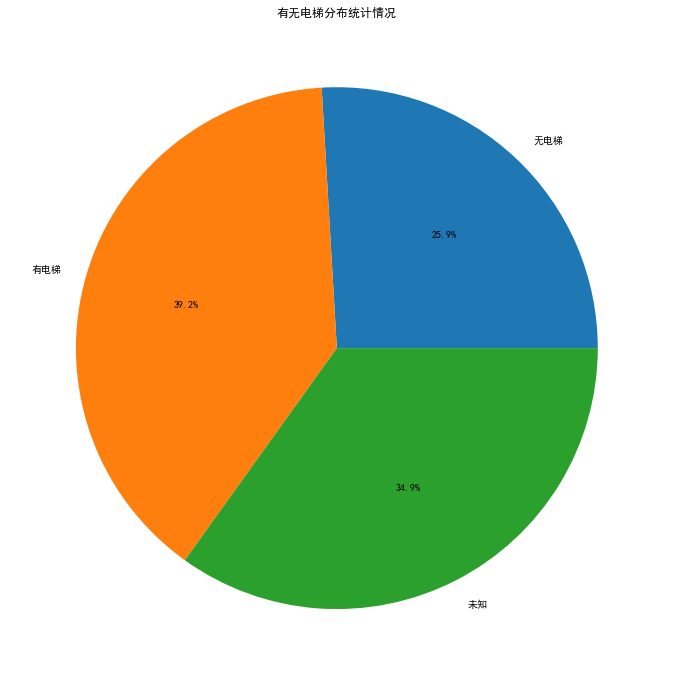

In [5]:
plt.figure(figsize=(12,12))#将画布设定为正方形，则绘制的饼图是正圆
plt.pie(ylist,labels=xlist,autopct='%1.1f%%')#绘制饼图
plt.title('有无电梯分布统计情况')#绘制标题
plt.savefig('./2.2有无电梯分布统计情况.jpg')#保存图片
plt.show()

房间类型统计分析

In [6]:
directions = file[['Id', 'Layout']].groupby('Layout').count()
xlist = list(directions.index)
ylist = list(directions['Id'])

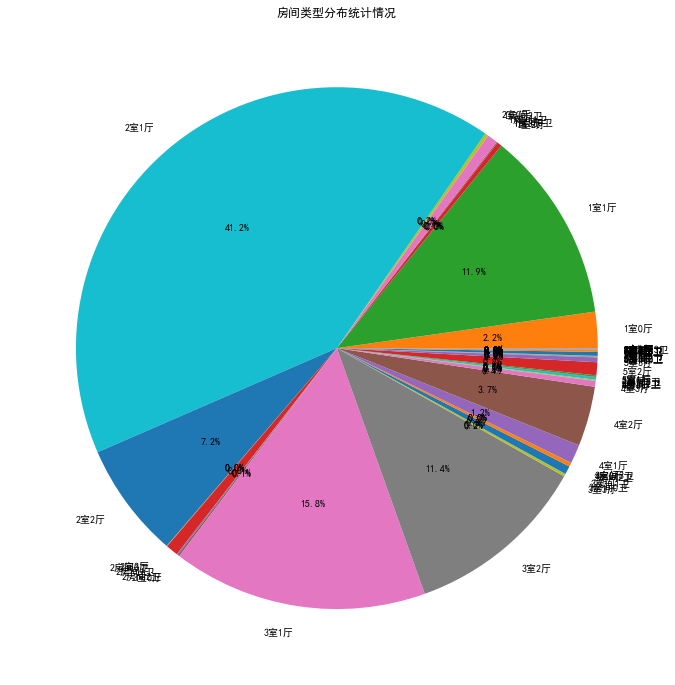

In [7]:
plt.figure(figsize=(12,12))#将画布设定为正方形，则绘制的饼图是正圆
plt.pie(ylist,labels=xlist,autopct='%1.1f%%')#绘制饼图
plt.title('房间类型分布统计情况')#绘制标题
plt.savefig('./2.3房间类型分布统计情况.jpg')#保存图片
plt.show()

户型太多，可视化效果较差，进行处理分析

In [8]:
print(ylist)

[1, 495, 2636, 66, 1, 14, 144, 2, 45, 9118, 1586, 5, 2, 169, 18, 23, 3499, 2515, 35, 3, 114, 52, 2, 1, 259, 820, 79, 4, 14, 30, 7, 1, 22, 177, 64, 4, 1, 10, 5, 2, 54, 23, 3, 2, 3, 1, 4, 6, 1, 2, 2, 1, 1, 1, 1]


In [9]:
# 将房间数小于100的均处理为其他
xlist1 = []
ylist1 = []
tmp_cnt = 0
for i in range(0, len(xlist)):
    if ylist[i] < 100:
        tmp_cnt += ylist[i]
    else:
        xlist1.append(xlist[i])
        ylist1.append(ylist[i])
xlist1.append('其他')
ylist1.append(tmp_cnt)

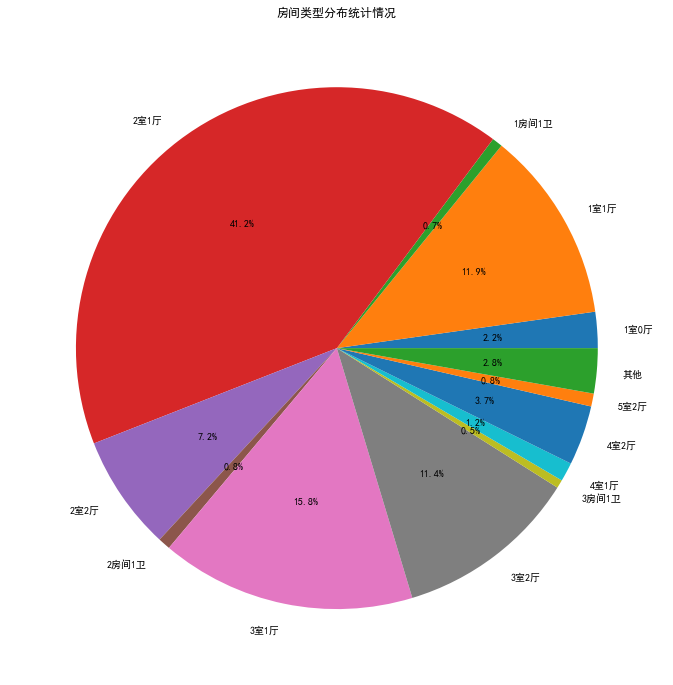

In [10]:
plt.figure(figsize=(12,12))#将画布设定为正方形，则绘制的饼图是正圆
plt.pie(ylist1,labels=xlist1,autopct='%1.1f%%')#绘制饼图
plt.title('房间类型分布统计情况')#绘制标题
plt.savefig('./2.3.1房间类型分布统计情况(优化).jpg')#保存图片
plt.show()

装修情况统计分析

In [11]:
directions = file[['Id', 'Renovation']].groupby('Renovation').count()
xlist = list(directions.index)
ylist = list(directions['Id'])

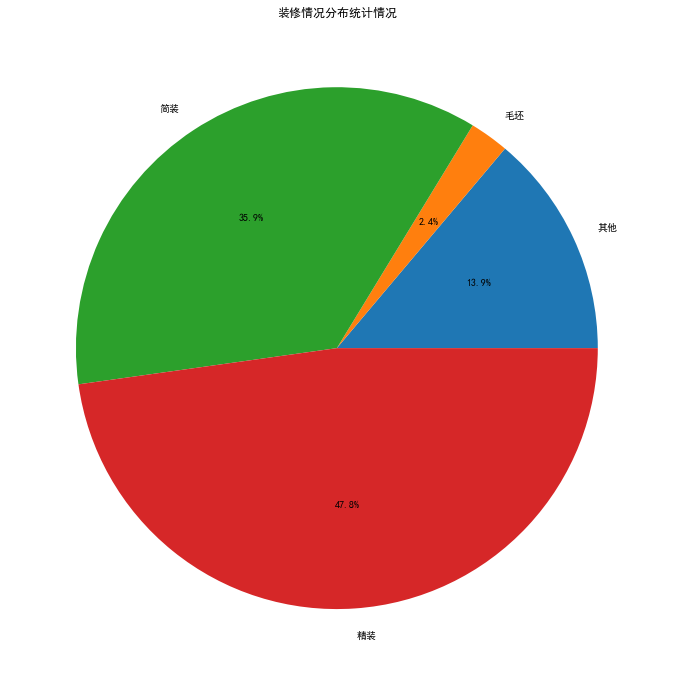

In [12]:
plt.figure(figsize=(12,12))#将画布设定为正方形，则绘制的饼图是正圆
plt.pie(ylist,labels=xlist,autopct='%1.1f%%')#绘制饼图
plt.title('装修情况分布统计情况')#绘制标题
plt.savefig('./2.4装修情况分布统计情况.jpg')#保存图片
plt.show()

年份统计分布

In [13]:
yr_dic = {}
for i in range(1950, 2018, 1):
    yr_dic[i] = 0  # 初始化
for i in range(0, len(file)):
    yr_dic[file['Year'].iloc[i]] += 1
xlist = list(yr_dic.keys())
ylist = list(yr_dic.values())

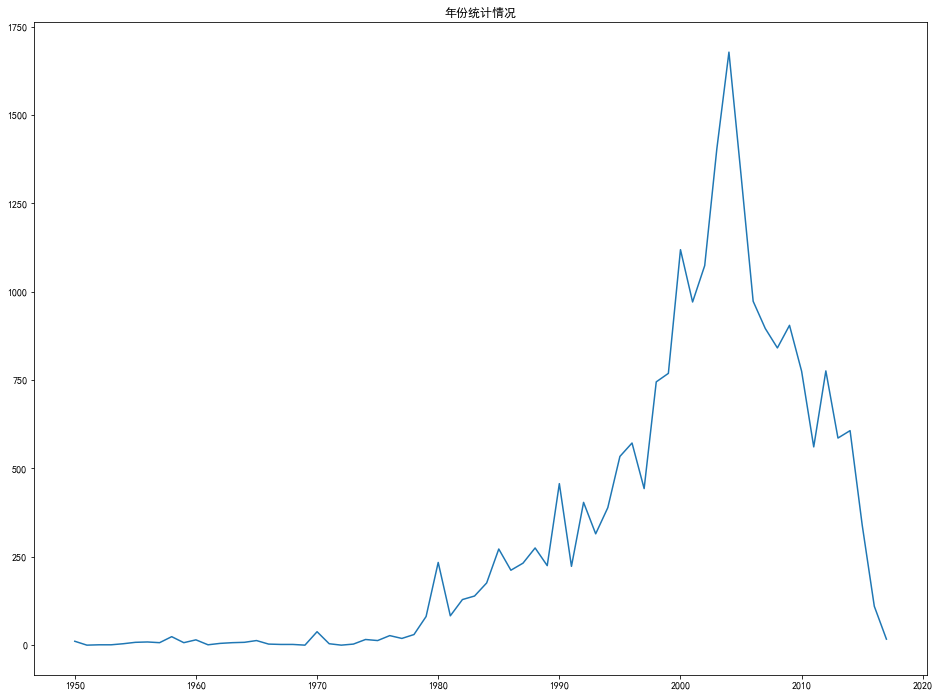

In [14]:
plt.figure(figsize=(16,12))
plt.plot(xlist, ylist)
plt.title('年份统计情况')#绘制标题
plt.savefig('./2.5年份统计情况折线图.jpg')#保存图片
plt.show()

In [15]:
fl_dic = {}
for i in range(1, 58, 1):
    fl_dic[i] = 0  # 初始化
for i in range(0, len(file)):
    fl_dic[file['Floor'].iloc[i]] += 1
xlist = list(fl_dic.keys())
ylist = list(fl_dic.values())

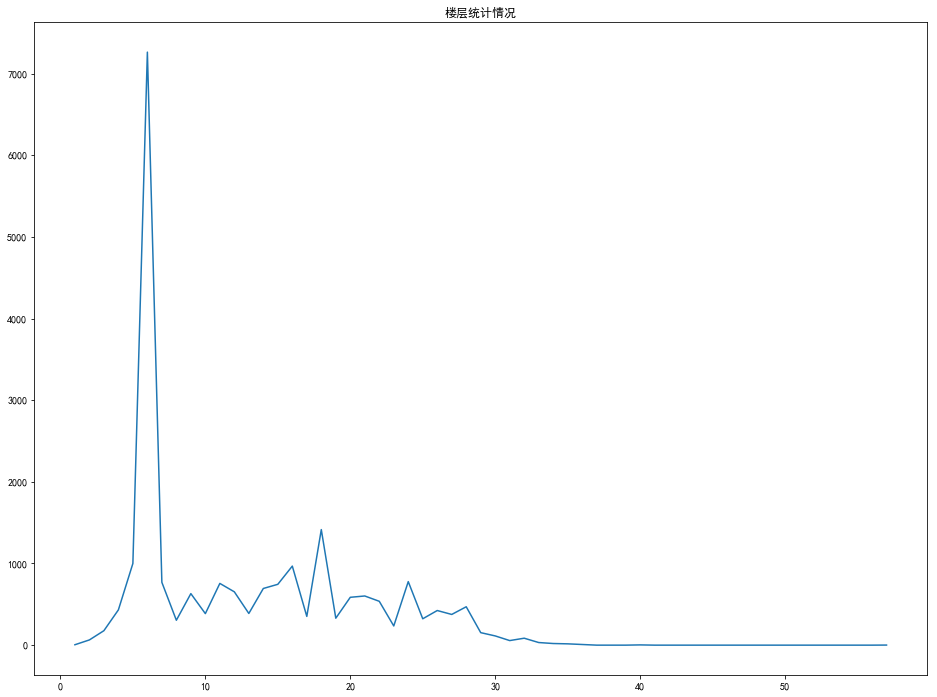

In [16]:
plt.figure(figsize=(16,12))
plt.plot(xlist, ylist)
plt.title('楼层统计情况')#绘制标题
plt.savefig('./2.6楼层统计情况折线图.jpg')#保存图片
plt.show()

In [17]:
di_dic = {}
for i in range(0, len(file)):
    region = file['Region'].iloc[i]
    if region not in di_dic:
        di_dic[region] = 1
    else:
        di_dic[region] += 1
xlist = list(di_dic.keys())
ylist = list(di_dic.values())

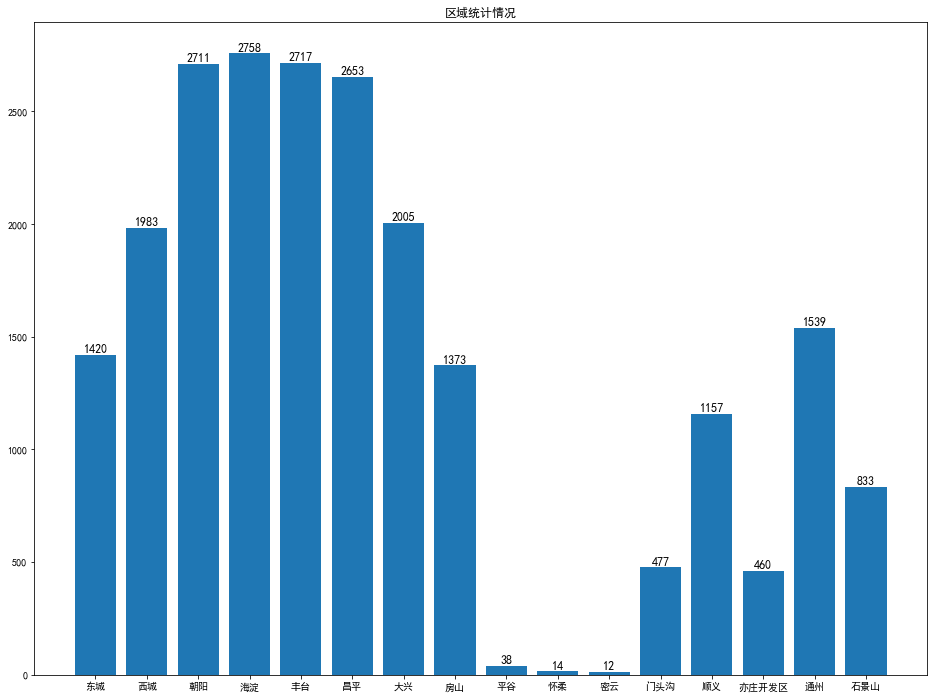

In [18]:
plt.figure(figsize=(16,12))
plt.bar(xlist, ylist)
for a, b in zip(xlist, ylist):
    plt.text(a, b + 0.02, b, ha = 'center', va = 'bottom', fontsize = 12)
plt.title('区域统计情况')#绘制标题
plt.savefig('./2.7区域统计情况柱状图.jpg')#保存图片
plt.show()